In [ ]:
from transformers import BertConfig, BertModel, BertTokenizer
import pandas as pd
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

from flair.embeddings import BertEmbeddings
from flair.data import Sentence

In [ ]:
model_path = "../models/munliv/best_model"
tokeniser_path = "../models/munliv/best_model/tokenizer_config"
data_file_path = "../data/preprocessed-without_tokenisation/2019_10_20_16_06.tsv"

Load data

In [ ]:
colnames = ['Id', 'Time', 'Text', 'Hashtag', 'Location']
train = pd.read_csv(data_file_path, sep='\t', names=colnames, header=None)
print(train['Text'].head())


0    Mourinho: "I’m going to try and get a job like...
1    In the thick of it 💪 13 minutes played at Old ...
2    In fairness, Utd are working hard in this game...
3    This could ultimately be @LFC ‘s undoing and @...
4    This team that is playing against Man U, is it...
Name: Text, dtype: object
Mourinho: "I’m going to try and get a job like Ole has, and speak all the time about the future. I think it’s a great situation, three year contract – the future, the young players. I think it’s a great job to do in such a giant club.” mufc [Sky]


BERT- Extract word embeddings

In [ ]:
def load_model_flair(model_path): 
  model = BertEmbeddings(bert_model_or_path=model_path)
  return model

def get_embeddings_flair(text, model):
    embeddings = []
    words = []
    sentence = Sentence(text)
    model.embed(sentence)
    for token in sentence:
        words.append(token.text)
        embeddings.append(token.embedding.numpy())
    return embeddings, words

# method to get 2-dimensional token embeddings correspond to list of sentences
def get_bulk_embeddings_flair(text_list, model, cased=False):
  embeddings = []
  tokens = []

  for row in range(len(text_list)):
    if cased:
      temp_embeddings, temp_tokens = get_embeddings_flair(text_list[row], model)
    else:
      temp_embeddings, temp_tokens = get_embeddings_flair(text_list[row].lower(), model)

    embeddings.extend(temp_embeddings)
    tokens.extend(temp_tokens)

  embeddings = np.array(embeddings)
  tokens = np.array(tokens)

  tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
              learning_rate = 1000, n_iter = 1500)
  embeddings = tsne.fit_transform(embeddings)
  return embeddings, tokens

t-SNE visualisation methods

In [ ]:
def tsne_plot_words(title, embeddings, words, a, filename=None):
  plt.figure(figsize=(16, 9))
  x = embeddings[:, 0]
  y = embeddings[:, 1]
  plt.scatter(x, y, alpha=a)
  for i, word in enumerate(words):
    plt.annotate(word, alpha=0.5, xy=(embeddings[i][0], embeddings[i][1]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
  plt.title(title)
  plt.grid(True)
  if filename:
    plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')
  plt.show()

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    # colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    colors = ['red', 'blue']
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')
    plt.show()

Data filtering methods

In [ ]:
# filter text which contain given word
def filter_by_word(data, word):
  filtered_data = []
  for text in data:
    splits = (text.lower()).split()
    if word in splits:
      filtered_data.append(text)
  return filtered_data

def get_unique(data):
  return list(set(data))


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128074 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  font.

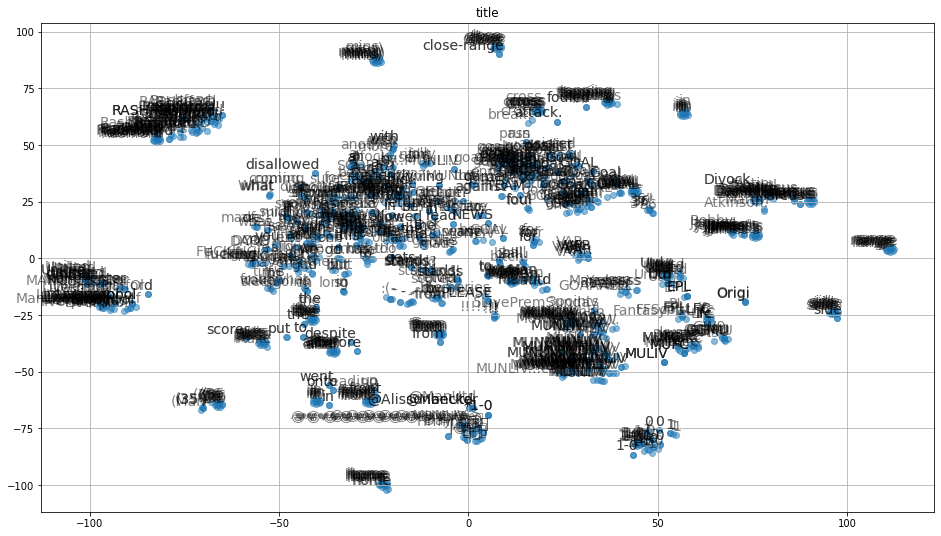

In [ ]:
# Word representations - filtered text with 'goal'

# load model
model = load_model_flair(model_path)

filtered_data = filter_by_word(train['Text'], 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data, model)

tsne_plot_words("title", embeddings, tokens, a=0.5)

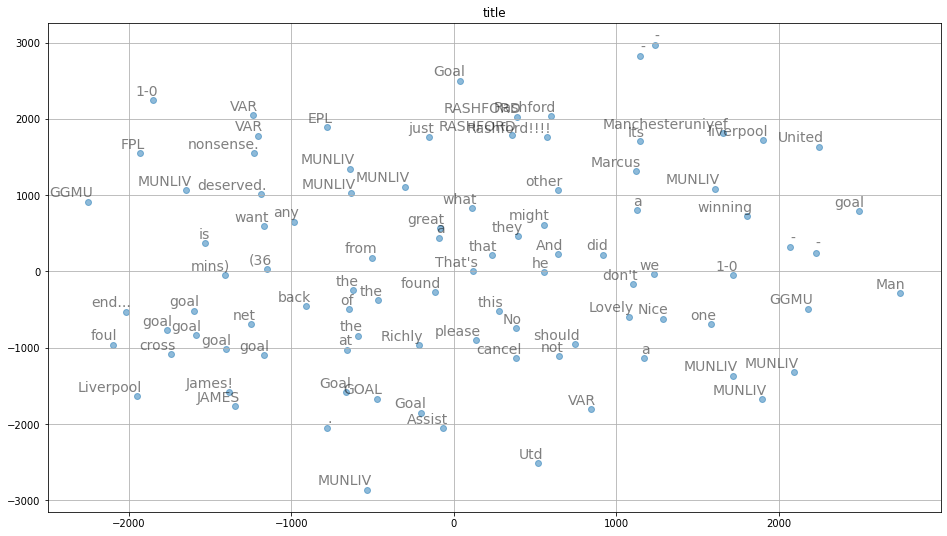

In [ ]:
# Word representations - unique filtered text with 'goal'

# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data[:10], model)

tsne_plot_words("title", embeddings, tokens, a=0.5)

98


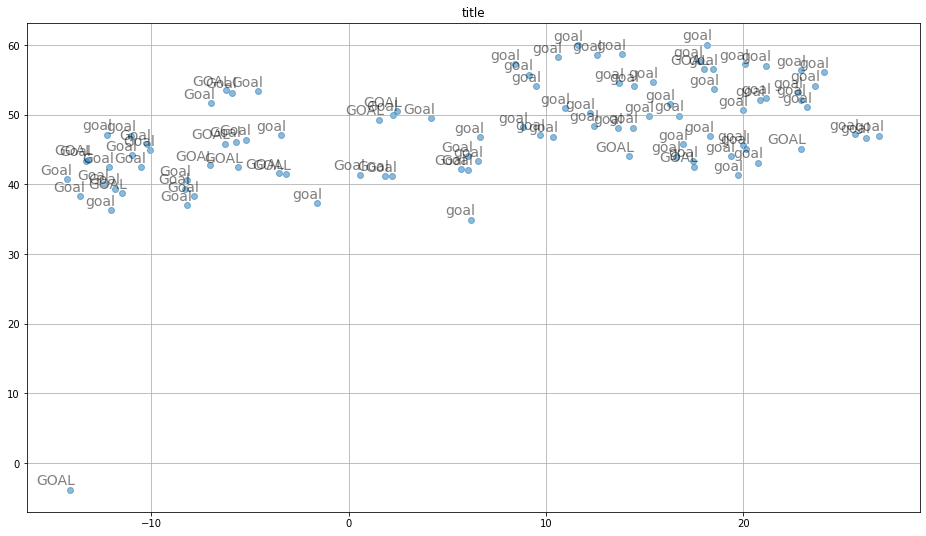

In [ ]:
# Word 'goal' representations - unique filtered text with 'goal'

# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data, model)

filtered_embeddings = []
filtered_tokens = []
# remove other tokens
for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' == token.lower():
    filtered_embeddings.append(embedding)
    filtered_tokens.append(token)

filtered_embeddings = np.array(filtered_embeddings)
filtered_tokens = np.array(filtered_tokens)
print(len(filtered_tokens))

tsne_plot_words("title", filtered_embeddings, filtered_tokens, a=0.5)

['Goal Rashford MUNLIV', "Holy fucking shit what is going on omg what a goal I haven't seen one in so long MUFC", "goal 36' marcus rashford manchester united:1 liverpool:0 MUNLIV", 'Rashford has a goal in this game! MUNLIV', 'Goal ! Rashford !! MUFC', 'Goal Manchesteruniyef is winning MUNLIV Rashford', 'Goal MUNLIV', "37' rashford with a goal MUNLIV 1-0", 'VAR check over, goal stands MUNLIV', 'Goal Rashford!!!! MUNLIV']


No handles with labels found to put in legend.


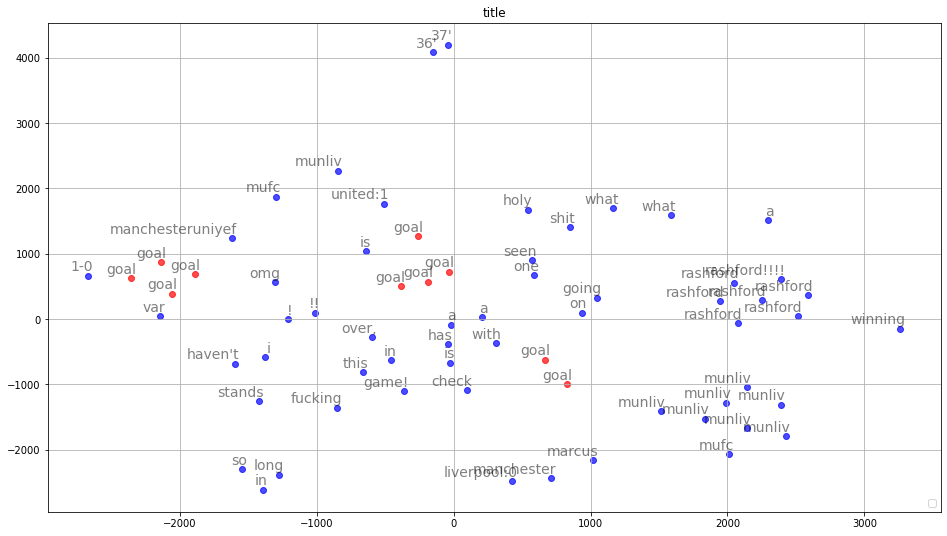

In [ ]:
import random

# # load model
# model = load_model_flair(model_path)

unique_data = get_unique(train['Text'])
filtered_data = filter_by_word(unique_data, 'goal')
random.shuffle(filtered_data)

filtered_data_subset = filtered_data[:10]
print(filtered_data_subset)

# get bulk embeddings
embeddings, tokens = get_bulk_embeddings_flair(filtered_data_subset, model)

embeddings_goal = []
embeddings_other = []
tokens_goal = []
tokens_other = []

for i in range(len(tokens)):
  token = tokens[i]
  embedding = embeddings[i]
  if 'goal' in token.lower():
    embeddings_goal.append(embedding)
    tokens_goal.append(token)
  else:
    embeddings_other.append(embedding)
    tokens_other.append(token)

embedding_clusters = [np.array(embeddings_goal), np.array(embeddings_other)]
token_clusters = [np.array(tokens_goal), np.array(tokens_other)]

tsne_plot_similar_words('title', [0,1], embedding_clusters, token_clusters, a=0.7, filename="../plots/BERT-visualisations/figure.png")